<a href="https://colab.research.google.com/github/gabrielealberto/Mortgage-calculator/blob/main/Mortgage_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
cap=200000
years=30
months=years*12
spread=0.01
i=0.027

In [42]:
def main(cap, years, i):
    im=i/12
    months=years*12

    df = pd.DataFrame(index=range(0, months), columns=['installment', 'interest_payment', 'principal_payment', 'remaining_principal', 'remaining_interest'])
    installment_const= cap*(im/(1-(1+im)**-months))
    tot_int_total = (installment_const*months)-cap  # Calcolo totale interessi

    #Set first row
    df['installment']=installment_const
    df.iloc[0,1]=cap*im
    df.iloc[0,2]=df.iloc[0,0]-df.iloc[0,1]
    df.iloc[0,3]=cap-df.iloc[0,2]
    df.iloc[0,4]=tot_int_total-df.iloc[0,1]  # Fix: interessi totali - interessi già pagati


    #fulfill table
    for i in range(1, len(df)):
        df.iloc[i,1]=df.iloc[i-1,3]*im
        df.iloc[i,2]=df.iloc[i,0]-df.iloc[i,1]
        df.iloc[i,3]=df.iloc[i-1,3]-df.iloc[i,2]
        df.iloc[i,4]=df.iloc[i-1,4]-df.iloc[i,1]  # Fix: sottrai gli interessi pagati questo mese
    tot_int=df.iloc[:,1].sum()
    return df, installment_const, tot_int
table, installment_const, tot_int=main(cap, years, i)

table

,installment,interest_payment,principal_payment,remaining_principal,remaining_interest
0,811.195245,450.0,361.195245,199638.804755,91580.288096
1,811.195245,449.187311,362.007934,199276.796821,91131.100785
2,811.195245,448.372793,362.822452,198913.974369,90682.727992
3,811.195245,447.556442,363.638802,198550.335567,90235.17155
4,811.195245,446.738255,364.45699,198185.878577,89788.433295
...,...,...,...,...,...
355,811.195245,9.064668,802.130576,3226.610897,18.170082
356,811.195245,7.259875,803.93537,2422.675527,10.910207
357,811.195245,5.45102,805.744225,1616.931302,5.459187
358,811.195245,3.638095,807.557149,809.374153,1.821092


Constant installment: 811.2 EUR
Total interests payed: 92030.29 EUR


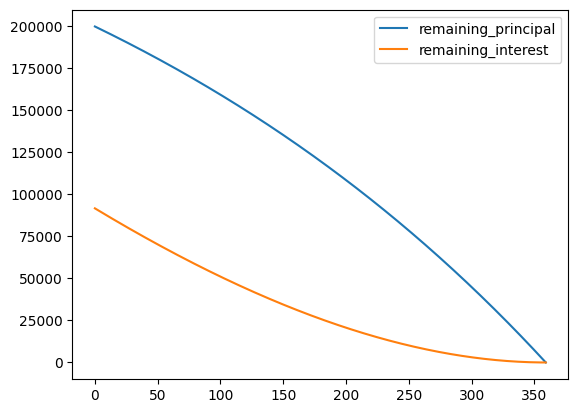

In [43]:
table.iloc[:,3:].plot()
print('Constant installment:', round(installment_const, 2), 'EUR')
print('Total interests payed:', round(tot_int, 2), 'EUR')

<Axes: >

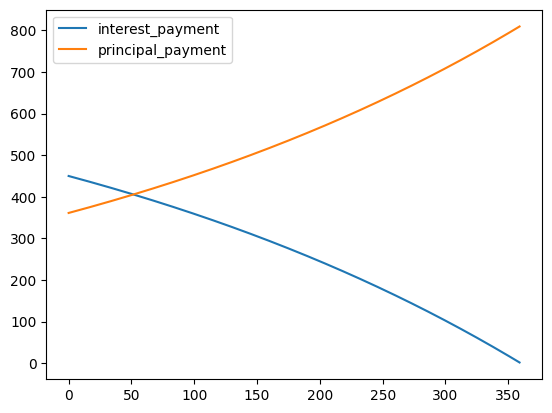

In [44]:
table.iloc[:,1:3].plot()